Degree=1, C=0.01, Validation Accuracy: 0.4167
Degree=1, C=0.10, Validation Accuracy: 0.6250
Degree=1, C=1.00, Validation Accuracy: 0.9167
Degree=1, C=10.00, Validation Accuracy: 0.9167
Degree=1, C=25.00, Validation Accuracy: 0.8750
Degree=1, C=50.00, Validation Accuracy: 0.8750
Degree=1, C=75.00, Validation Accuracy: 0.8750
Degree=1, C=100.00, Validation Accuracy: 0.8750
Degree=1, C=250.00, Validation Accuracy: 0.8750
Degree=1, C=500.00, Validation Accuracy: 0.8750
Degree=1, C=1000.00, Validation Accuracy: 0.8750
Degree=2, C=0.01, Validation Accuracy: 0.2917
Degree=2, C=0.10, Validation Accuracy: 0.3333
Degree=2, C=1.00, Validation Accuracy: 0.7083
Degree=2, C=10.00, Validation Accuracy: 0.7083
Degree=2, C=25.00, Validation Accuracy: 0.6667
Degree=2, C=50.00, Validation Accuracy: 0.6250
Degree=2, C=75.00, Validation Accuracy: 0.6250
Degree=2, C=100.00, Validation Accuracy: 0.6250
Degree=2, C=250.00, Validation Accuracy: 0.6250
Degree=2, C=500.00, Validation Accuracy: 0.6250
Degree=2, C

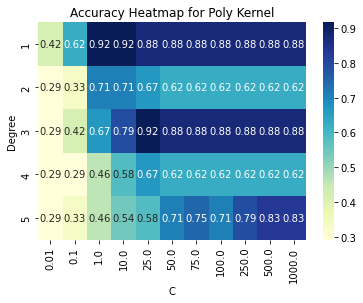

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#from google.colab import files

# Upload files
#uploaded = files.upload()

# Load the CSVs
train = pd.read_csv('train.csv')
val = pd.read_csv('validation.csv')
test = pd.read_csv('test.csv')

# Separate features and labels
X_train = train.drop(columns=['Label'])
y_train = train['Label']

X_val = val.drop(columns=['Label'])
y_val = val['Label']

X_test = test.drop(columns=['Label'])
y_test = test['Label']

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to track the best model and its accuracy
best_accuracy = 0
best_params = {'degree': None, 'C': None}

# Store scores for heatmap
scores = []

degree_range = range(1, 6)
C_range = [0.01, 0.1, 1, 10, 25, 50, 75, 100, 250, 500, 1000] #C parameter range doesn't change or affect accuracy score for test by much, if at all

for degree in degree_range:
    for C in C_range:
        model = SVC(kernel='poly', degree=degree, C=C, random_state=123)
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        accuracy = accuracy_score(y_val, y_val_pred)

        print(f"Degree={degree}, C={C:.2f}, Validation Accuracy: {accuracy:.4f}")

        scores.append([degree, C, accuracy])

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['degree'] = degree
            best_params['C'] = C

# Report best parameters
print("\nBest parameters found:")
print(f"Degree={best_params['degree']}, C={best_params['C']:.2f}, Validation Accuracy: {best_accuracy:.4f}")

# Retrain final model on full training data
final_model = SVC(kernel='poly', degree=best_params['degree'], C=best_params['C'], random_state=123)
final_model.fit(X_train_scaled, y_train)

# Evaluate on test set
y_test_pred = final_model.predict(X_test_scaled)
print("\nFinal model on Test set:")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# Heatmap visualization on best parameter combination for poly kernel
results = pd.DataFrame(scores, columns=['Degree', 'C', 'Accuracy'])
heatmap_data = results.pivot_table(index='Degree', columns='C', values='Accuracy')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Accuracy Heatmap for Poly Kernel')
plt.show()

Gamma=0.0005, C=0.01, Validation Accuracy: 0.4167
Gamma=0.0005, C=0.1, Validation Accuracy: 0.4167
Gamma=0.0005, C=1, Validation Accuracy: 0.4167
Gamma=0.0005, C=10, Validation Accuracy: 0.4167
Gamma=0.0005, C=50, Validation Accuracy: 0.8750
Gamma=0.0005, C=100, Validation Accuracy: 0.9167
Gamma=0.0005, C=500, Validation Accuracy: 0.9583
Gamma=0.0005, C=1000, Validation Accuracy: 0.9583
Gamma=0.001, C=0.01, Validation Accuracy: 0.4167
Gamma=0.001, C=0.1, Validation Accuracy: 0.4167
Gamma=0.001, C=1, Validation Accuracy: 0.4167
Gamma=0.001, C=10, Validation Accuracy: 0.6667
Gamma=0.001, C=50, Validation Accuracy: 0.9167
Gamma=0.001, C=100, Validation Accuracy: 0.9583
Gamma=0.001, C=500, Validation Accuracy: 0.9583
Gamma=0.001, C=1000, Validation Accuracy: 0.9167
Gamma=0.005, C=0.01, Validation Accuracy: 0.4167
Gamma=0.005, C=0.1, Validation Accuracy: 0.4167
Gamma=0.005, C=1, Validation Accuracy: 0.4167
Gamma=0.005, C=10, Validation Accuracy: 0.8750
Gamma=0.005, C=50, Validation Accuracy

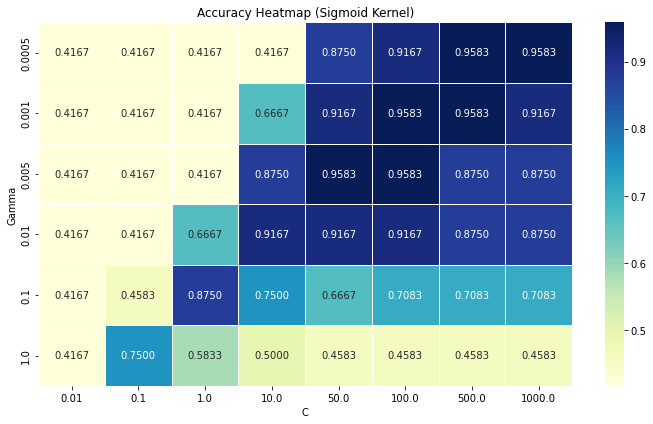

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

best_accuracy = 0
best_params = {'C': None, 'gamma': None}
scores = []

# Define ranges
C_range = [0.01, 0.1, 1, 10, 50, 100, 500, 1000]
gamma_range = [0.0005, 0.001, 0.005, 0.01, 0.1, 1]

# Grid search over C and gamma (using validation accuracy)
for gamma in gamma_range:
    for C in C_range:
        model = SVC(kernel='sigmoid', C=C, gamma=gamma, random_state=123)
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        accuracy = accuracy_score(y_val, y_val_pred)
        print(f"Gamma={gamma}, C={C}, Validation Accuracy: {accuracy:.4f}")

        scores.append((gamma, C, accuracy))

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['C'] = C
            best_params['gamma'] = gamma

# Report best parameters
print("\nBest parameters found:")
print(f"C={best_params['C']}, Gamma={best_params['gamma']}, Validation Accuracy: {best_accuracy:.4f}")

# Retrain on training set with best params and evaluate on test
final_model = SVC(kernel='sigmoid', C=best_params['C'], gamma=best_params['gamma'], random_state=123)
final_model.fit(X_train_scaled, y_train)
y_test_pred = final_model.predict(X_test_scaled)

# Test results
print("\nFinal model on Test set:")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# Heatmap of validation accuracy to see which parameters are the best combination for final best kernel + params before evaluating on the test set
results_df = pd.DataFrame(scores, columns=['Gamma', 'C', 'Accuracy'])
heatmap_data = results_df.pivot(index='Gamma', columns='C', values='Accuracy')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='YlGnBu', linewidths=0.5)
plt.title("Accuracy Heatmap (Sigmoid Kernel)")
plt.xlabel("C")
plt.ylabel("Gamma")
plt.tight_layout()
plt.show()

C=0.01, Validation Accuracy: 0.6667
C=0.10, Validation Accuracy: 0.9583
C=1.00, Validation Accuracy: 0.9167
C=10.00, Validation Accuracy: 0.8750
C=25.00, Validation Accuracy: 0.8750
C=50.00, Validation Accuracy: 0.8750
C=75.00, Validation Accuracy: 0.8750
C=100.00, Validation Accuracy: 0.8750
C=250.00, Validation Accuracy: 0.8750
C=500.00, Validation Accuracy: 0.8750
C=1000.00, Validation Accuracy: 0.8750

Best parameters found:
C=0.1, Validation Accuracy: 0.9583

Final model on Test set:
              precision    recall  f1-score   support

     ChatGPT       0.62      1.00      0.77         5
    LinkedIn       1.00      0.78      0.88         9
      Reddit       1.00      1.00      1.00         6
   Wikipedia       1.00      0.75      0.86         4

    accuracy                           0.88        24
   macro avg       0.91      0.88      0.88        24
weighted avg       0.92      0.88      0.88        24

Test Accuracy: 0.8750


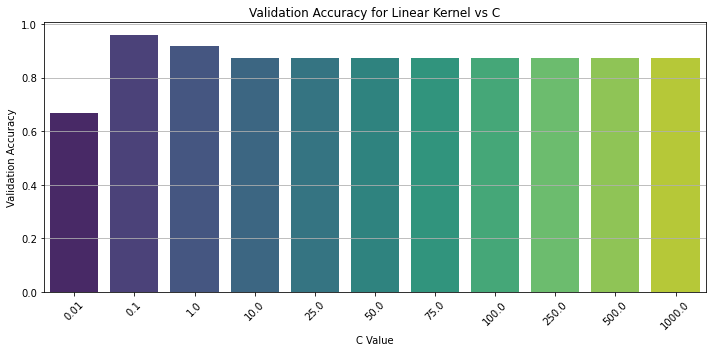

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

best_accuracy = 0
best_C = None
results = []

# Only vary C for linear kernel
C_range = [0.01, 0.1, 1, 10, 25, 50, 75, 100, 250, 500, 1000]

# Grid search using validation accuracy
for C in C_range:
    model = SVC(kernel='linear', C=C, random_state=123)
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_val_pred)
    results.append((C, accuracy))
    print(f"C={C:.2f}, Validation Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

# Report best C
print("\nBest parameters found:")
print(f"C={best_C}, Validation Accuracy: {best_accuracy:.4f}")

# Retrain on train + val
X_trainval = np.vstack([X_train_scaled, X_val_scaled]) #stack vertically because they're 2D [samples, features]
y_trainval = np.concatenate([y_train, y_val]) #only 1D,

final_model = SVC(kernel='linear', C=best_C, random_state=123)
final_model.fit(X_trainval, y_trainval)

# Evaluate on test set
y_test_pred = final_model.predict(X_test_scaled)
print("\nFinal model on Test set:")
print(classification_report(y_test, y_test_pred, zero_division=0))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# Visualize validation accuracy for C alone, since linear doesn't use degrees or other params like gamma
results_df = pd.DataFrame(results, columns=['C', 'Validation Accuracy'])
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='C', y='Validation Accuracy', palette='viridis')
plt.title('Validation Accuracy for Linear Kernel vs C')
plt.xlabel('C Value')
plt.ylabel('Validation Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define hyperparameter search ranges
C_range = [0.01, 0.1, 1, 10, 50, 100, 500, 1000]
gamma_range = np.arange(0.0005, 0.0101, 0.0001)

# Track best model and all results for RBF kernel
top_accuracy = 0
best_params = {'gamma': None, 'C': None}
results = []

# Grid search using validation set
for gamma in gamma_range:
    for C in C_range:
        model = SVC(kernel='rbf', gamma=gamma, C=C, random_state=123)
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        accuracy = accuracy_score(y_val, y_val_pred)
        print(f"Gamma={gamma:.4f}, C={C:.2f}, Validation Accuracy: {accuracy:.4f}")
        results.append((gamma, C, accuracy))

        if accuracy > top_accuracy:
            top_accuracy = accuracy
            best_params['gamma'] = gamma
            best_params['C'] = C

# Output best validation combo
print("\nBest parameters from validation:")
print(f"Gamma={best_params['gamma']}, C={best_params['C']}, Validation Accuracy: {top_accuracy:.4f}")

# Retrain on full train + val set
X_trainval = np.vstack([X_train_scaled, X_val_scaled])
y_trainval = np.concatenate([y_train, y_val])

final_model = SVC(kernel='rbf', gamma=best_params['gamma'], C=best_params['C'], random_state=123)
final_model.fit(X_trainval, y_trainval)

y_test_pred = final_model.predict(X_test_scaled)

# Report final validation + test performance
print(f"\nValidation Accuracy (Best Params): {top_accuracy:.4f}")
print("\nFinal model on Test set:")
print(classification_report(y_test, y_test_pred, zero_division=0))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# too many data to put on a simple heatmap, unless comfortable with blowing up figsize to see it all
# Heatmap of validation accuracy
# results_df = pd.DataFrame(results, columns=['Gamma', 'C', 'Accuracy'])
# heatmap_data = results_df.pivot(index='Gamma', columns='C', values='Accuracy')

# plt.figure(figsize=(50, 30))
# sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='YlGnBu', linewidths=0.5)
# plt.title("Validation Accuracy Heatmap (RBF Kernel)")
# plt.xlabel("C")
# plt.ylabel("Gamma")

# # Highlight best param combo
# plt.scatter(
#     x=heatmap_data.columns.get_loc(best_params['C']) + 0.5,
#     y=heatmap_data.index.get_loc(best_params['gamma']) + 0.5
# )
# plt.legend(loc='upper right')
# plt.tight_layout()
# plt.show()

Gamma=0.0005, C=0.01, Validation Accuracy: 0.4167
Gamma=0.0005, C=0.10, Validation Accuracy: 0.4167
Gamma=0.0005, C=1.00, Validation Accuracy: 0.4167
Gamma=0.0005, C=10.00, Validation Accuracy: 0.6667
Gamma=0.0005, C=50.00, Validation Accuracy: 0.9167
Gamma=0.0005, C=100.00, Validation Accuracy: 0.9583
Gamma=0.0005, C=500.00, Validation Accuracy: 0.9583
Gamma=0.0005, C=1000.00, Validation Accuracy: 0.9167
Gamma=0.0006, C=0.01, Validation Accuracy: 0.4167
Gamma=0.0006, C=0.10, Validation Accuracy: 0.4167
Gamma=0.0006, C=1.00, Validation Accuracy: 0.4167
Gamma=0.0006, C=10.00, Validation Accuracy: 0.7500
Gamma=0.0006, C=50.00, Validation Accuracy: 0.9167
Gamma=0.0006, C=100.00, Validation Accuracy: 0.9583
Gamma=0.0006, C=500.00, Validation Accuracy: 0.9583
Gamma=0.0006, C=1000.00, Validation Accuracy: 0.9167
Gamma=0.0007, C=0.01, Validation Accuracy: 0.4167
Gamma=0.0007, C=0.10, Validation Accuracy: 0.4167
Gamma=0.0007, C=1.00, Validation Accuracy: 0.4167
Gamma=0.0007, C=10.00, Validatio

In [13]:
# ─────────────────── 1. Train fixed‑parameter SVM ───────────────────
BEST_GAMMA = 0.0005
BEST_C     = 100

svm_rbf = SVC(kernel='rbf',
              gamma=BEST_GAMMA,
              C=BEST_C,
              random_state=123)

# Fit on (train + val)
X_trainval = np.vstack([X_train_scaled, X_val_scaled])
y_trainval = np.concatenate([y_train, y_val])

svm_rbf.fit(X_trainval, y_trainval)

# ─────────────────── 2. Validation & Test metrics ───────────────────
y_val_pred  = svm_rbf.predict(X_val_scaled)
y_test_pred = svm_rbf.predict(X_test_scaled)

print("Validation accuracy:", accuracy_score(y_val, y_val_pred))
print("\nFinal model on Test set:")
print(classification_report(y_test, y_test_pred, zero_division=0))
print(f"Test accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# ─────────────────── 3. Confusion‑matrix heat‑map ───────────────────
# label maps
# label_mapping = {'ChatGPT': 0, 'Reddit': 1, 'Wikipedia': 2, 'LinkedIn': 3}
# index_to_label = {v: k for k, v in label_mapping.items()}
# string order you want on the axes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# string order you want on the axes
website_names = ['ChatGPT', 'Reddit', 'Wikipedia', 'LinkedIn']

cm = confusion_matrix(y_test, y_test_pred, labels=website_names)

def create_confusion_matrix_heatmap(cm, labels, title, color_scale='Blues'):
    text_values = [[str(val) for val in row] for row in cm]

    fig = ff.create_annotated_heatmap(
        z=cm,
        x=labels,
        y=labels,
        annotation_text=text_values,
        colorscale=color_scale,
        showscale=True
    )
    fig.update_layout(
        title_text=title,
        xaxis_title="Predicted Label",
        yaxis_title="True Label",
        xaxis_side="bottom",
        yaxis_autorange='reversed',
        xaxis=dict(tickangle=-45),
        margin=dict(l=100, r=50, t=100, b=100),
        font=dict(family='Arial', size=12, color='black'),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig.update_xaxes(type='category')
    fig.update_yaxes(type='category')
    return fig

fig_cm = create_confusion_matrix_heatmap(
    cm, website_names,
    'Confusion Matrix: SVM (RBF, γ=0.0005, C=100)',
    color_scale='Blues'
)
fig_cm.show()

Validation accuracy: 0.9583333333333334

Final model on Test set:
              precision    recall  f1-score   support

     ChatGPT       0.62      1.00      0.77         5
    LinkedIn       1.00      0.78      0.88         9
      Reddit       1.00      1.00      1.00         6
   Wikipedia       1.00      0.75      0.86         4

    accuracy                           0.88        24
   macro avg       0.91      0.88      0.88        24
weighted avg       0.92      0.88      0.88        24

Test accuracy: 0.8750


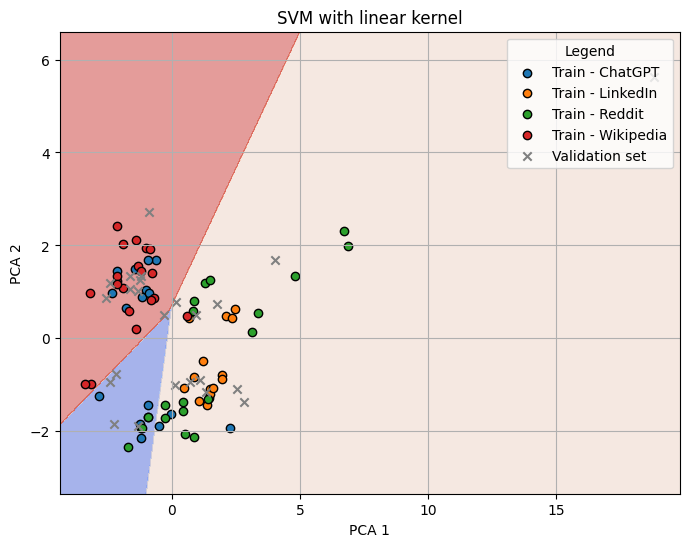

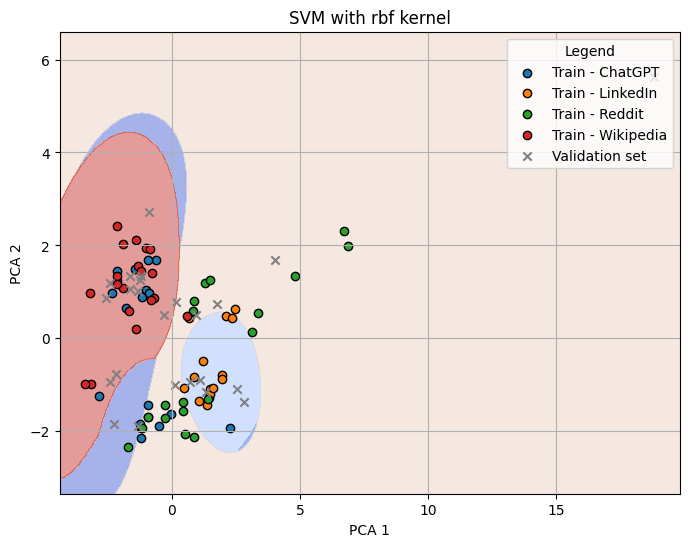

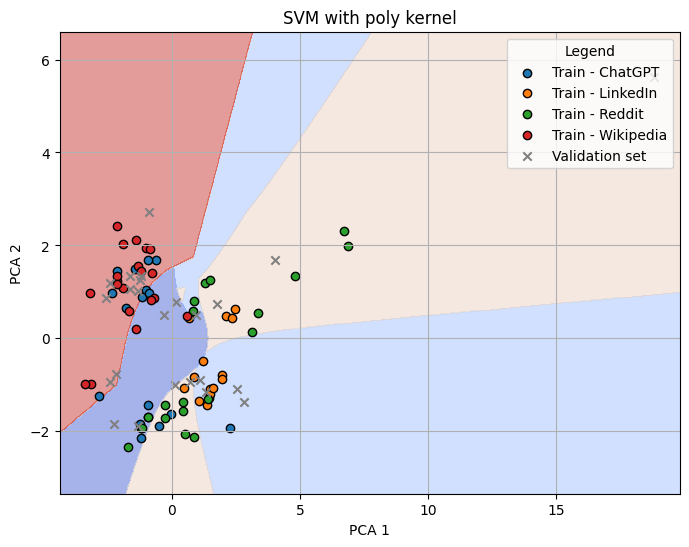

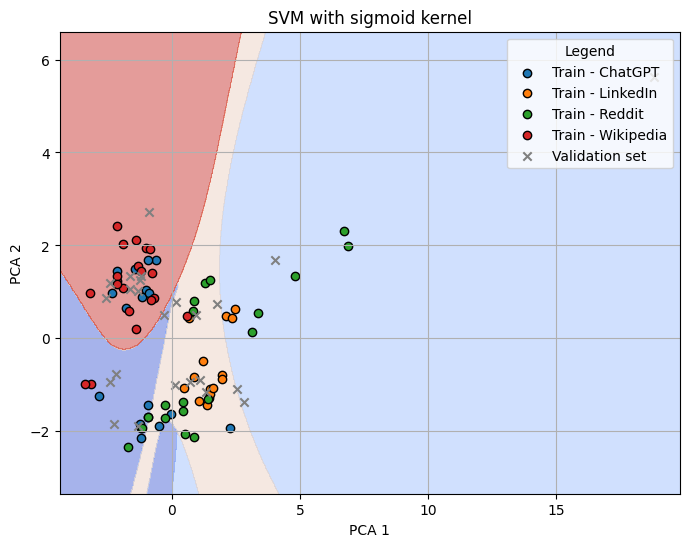

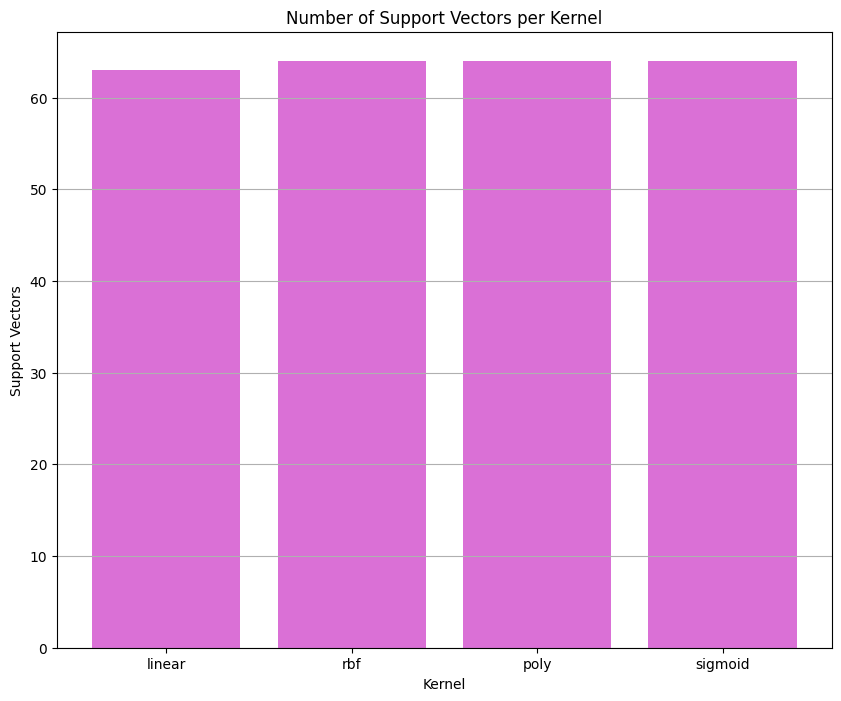

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Apply PCA to training data only (fit only on training set)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)  # Apply transform to validation set

def plot_kernel_decision_boundary(kernel, X_train_pca, y_train, X_val_pca, y_val):
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_val_encoded = le.transform(y_val)
    class_names = le.classes_

    # Train model only on training PCA data
    model = SVC(kernel=kernel, gamma='scale', C=1).fit(X_train_pca, y_train_encoded)

    h = 0.02
    # include validation data
    x_min = min(X_train_pca[:, 0].min(), X_val_pca[:, 0].min()) - 1
    x_max = max(X_train_pca[:, 0].max(), X_val_pca[:, 0].max()) + 1
    y_min = min(X_train_pca[:, 1].min(), X_val_pca[:, 1].min()) - 1
    y_max = max(X_train_pca[:, 1].max(), X_val_pca[:, 1].max()) + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)

    # Plot training data with class-colored dots
    for idx, class_name in enumerate(class_names):
        plt.scatter(
            X_train_pca[y_train_encoded == idx, 0],
            X_train_pca[y_train_encoded == idx, 1],
            edgecolors='k', label=f"Train - {class_name}"
        )

    # Plot validation data in gray
    plt.scatter(
        X_val_pca[:, 0], X_val_pca[:, 1],
        c='gray', marker='x', label='Validation set'
    )

    # Highlight support vectors
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100, facecolors='none', linewidths=0.5
    )

    plt.title(f"SVM with {kernel} kernel")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Legend', loc='upper right')
    plt.grid(True)
    plt.show()

    return model

# Kernel list and storage
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
all_models = []

# Plot each kernel decision boundary with validation points
for k in kernels:
    model = plot_kernel_decision_boundary(k, X_train_pca, y_train, X_val_pca, y_val)
    all_models.append(model)

# Bar plot of support vector count for each kernel used to compare model complexity: fewer = simpler, more = potentially overfitting and more complex.
plt.figure(figsize=(10,8))
plt.bar(kernels, [model.n_support_.sum() for model in all_models], color='orchid')
plt.title("Number of Support Vectors per Kernel")
plt.xlabel("Kernel")
plt.ylabel("Support Vectors")
plt.grid(axis='y')
plt.show()
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

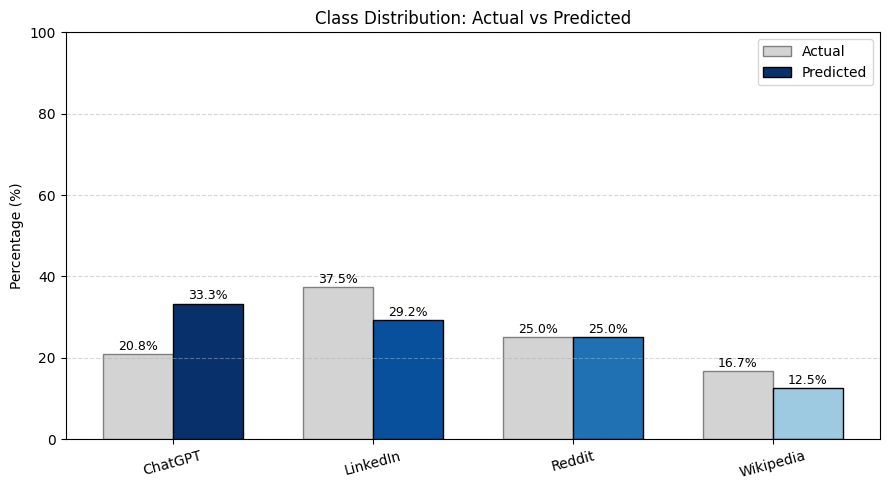

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Count true and predicted labels
true_counts = Counter(y_test)
pred_counts = Counter(y_test_pred)

# Use all unique class labels since the features are string-based
all_labels = sorted(set(true_counts.keys()) | set(pred_counts.keys()))

# Percent calculations
total = len(y_test)
true_percents = [(true_counts[label] / total) * 100 for label in all_labels] #percentify
pred_percents = [(pred_counts[label] / total) * 100 for label in all_labels]

# Color the predicted bars by their relative frequency
cmap = plt.colormaps.get_cmap("Blues")
max_percent = max(pred_percents)
pred_colors = [cmap(p / max_percent) if max_percent > 0 else 'lightblue' for p in pred_percents] #color code the precentages on the chart based on their values

# Plotting details..
x = np.arange(len(all_labels))
width = 0.35

plt.figure(figsize=(9, 5))
bars1 = plt.bar(x - width/2, true_percents, width, label='Actual', color='lightgray', edgecolor='gray')
bars2 = plt.bar(x + width/2, pred_percents, width, label='Predicted', color=pred_colors, edgecolor='black')

plt.ylabel('Percentage (%)')
plt.title('Class Distribution: Actual vs Predicted')
plt.xticks(x, all_labels, rotation=15)
plt.ylim(0, 100)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add percentage labels on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()